In [1]:
USE_GPU = True

if USE_GPU:
    device = "/device:GPU:0"
else:
    device = "/CPU:0"

print("Using device:", device)


Using device: /device:GPU:0


In [2]:
import pandas as pd
import numpy as np

CSV_IMAGE_INPUT_PATH = r""

x_train = pd.read_csv(CSV_IMAGE_INPUT_PATH + "\\" + "train.csv", header=None)
x_val = pd.read_csv(CSV_IMAGE_INPUT_PATH + "\\" + "val.csv", header=None)
x_test = pd.read_csv(CSV_IMAGE_INPUT_PATH + "\\" + "test.csv", header=None)
y_train = x_train.iloc[:, 0]
x_train = x_train.drop(0, axis=1)
y_val = x_val.iloc[:, 0]
x_val = x_val.drop(0, axis=1)
y_test = x_test.iloc[:, 0]
x_test = x_test.drop(0, axis=1)

y_train = y_train.to_numpy(np.int32)
x_train = x_train.to_numpy(np.float32)
y_val = y_val.to_numpy(np.int32)
x_val = x_val.to_numpy(np.float32)
y_test = y_test.to_numpy(np.int32)
x_test = x_test.to_numpy(np.float32)

x_train = x_train.reshape(x_train.shape[0], 100, 150, -1)
x_val = x_val.reshape(x_val.shape[0], 100, 150, -1)
x_test = x_test.reshape(x_test.shape[0], 100, 150, -1)

mean_pixel = x_train.mean(axis=(0, 1, 2), keepdims=True)
std_pixel = x_train.std(axis=(0, 1, 2), keepdims=True)
x_train = (x_train - mean_pixel) / std_pixel
x_val = (x_val - mean_pixel) / std_pixel
x_test = (x_test - mean_pixel) / std_pixel

print("x_train:", x_train.shape, x_train.dtype)
print("y_train:", y_train.shape, y_train.dtype)
print("x_val:", x_val.shape, x_val.dtype)
print("y_val:", y_val.shape, y_val.dtype)
print("x_test:", x_test.shape, x_test.dtype)
print("y_test:", y_test.shape, y_test.dtype)


x_train: (216, 100, 150, 3) float32
y_train: (216,) int32
x_val: (72, 100, 150, 3) float32
y_val: (72,) int32
x_test: (72, 100, 150, 3) float32
y_test: (72,) int32


In [3]:
labels = np.unique(y_train)

y_train = np.select([y_train == label for label in labels], [
                    *range(len(labels))])
y_val = np.select([y_val == label for label in labels], [*range(len(labels))])
y_test = np.select([y_test == label for label in labels],
                   [*range(len(labels))])


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (100, 150, 3)
num_classes = len(labels)

model = keras.Sequential()
model.add(layers.Conv2D(16, (3, 3), padding="same",
          activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 75, 16)        0         
                                                                 
 flatten (Flatten)           (None, 60000)             0         
                                                                 
 dense (Dense)               (None, 32)                1920032   
                                                                 
 dense_1 (Dense)             (None, 36)                1188      
                                                        

In [5]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(
    from_logits=False), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=None, epochs=20,
                    validation_data=(x_val, y_val))


Epoch 1/20
7/7 [==============================] - 3s 41ms/step - loss: 6.2930 - accuracy: 0.0602 - val_loss: 3.6662 - val_accuracy: 0.1389
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 3.1550 - accuracy: 0.1343 - val_loss: 3.2278 - val_accuracy: 0.1111
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 2.9341 - accuracy: 0.1111 - val_loss: 2.7619 - val_accuracy: 0.1667
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 2.4378 - accuracy: 0.2037 - val_loss: 2.4917 - val_accuracy: 0.2639
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 2.2413 - accuracy: 0.2963 - val_loss: 2.1711 - val_accuracy: 0.3056
Epoch 6/20
7/7 [==============================] - 0s 9ms/step - loss: 1.9385 - accuracy: 0.4120 - val_loss: 1.9975 - val_accuracy: 0.3611
Epoch 7/20
7/7 [==============================] - 0s 9ms/step - loss: 1.7436 - accuracy: 0.4815 - val_loss: 1.8460 - val_accuracy: 0.4583
Epoch 8/20
7/7 [==============

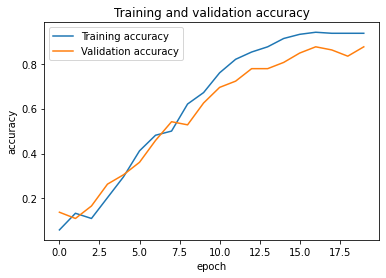

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training and validation accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()


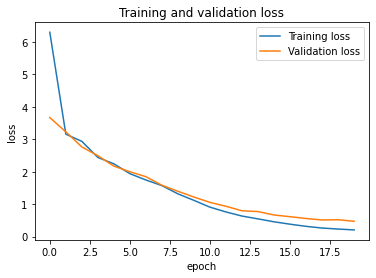

In [7]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Training and validation loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()


In [8]:
""" test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)
 """


3/3 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.8194
Test accuracy: 0.8194444179534912


In [9]:
""" MODEL__PATH = r""

version = "v1.0"
model.save(MODEL__PATH.format(type=type, version=version))
 """


INFO:tensorflow:Assets written to: C:\Users\carim\Desktop\University\Fondamenti di visione artificiale e biometria\Progetto\Codice\Modeling\models\dl\v1.0\assets
